In [79]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#display all columns in DataFrame without truncation
pd.set_option('display.max_columns',None)

In [81]:
# Reading data from an Excel file into a Pandas DataFrame
df = pd.read_excel('hospital admissions data.xlsx')

# Displaying the first few rows of the DataFrame to get an overview of the data
df.head()

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,2017-04-01 00:00:00,2017-04-03 00:00:00,81,M,R,E,2023-04-17,3,2,DISCHARGE,0,0,1,0,0,0,0,9.5,16.1,337,80,34,0.9,1880,1,35,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01 00:00:00,2017-04-05 00:00:00,65,M,R,E,2023-04-17,5,2,DISCHARGE,0,1,0,1,1,0,0,13.7,9,149,112,18,0.9,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01 00:00:00,2017-04-03 00:00:00,53,M,U,E,2023-04-17,3,3,DISCHARGE,0,0,1,0,1,0,0,10.6,14.7,329,187,93,2.3,210,0,NaN,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01 00:00:00,2017-04-08 00:00:00,67,F,U,E,2023-04-17,8,6,DISCHARGE,0,0,0,1,1,0,0,12.8,9.9,286,130,27,0.6,NaN,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01 00:00:00,2017-04-23 00:00:00,60,F,U,E,2023-04-17,23,9,DISCHARGE,0,0,0,1,0,1,0,13.6,9.1,26,144,55,1.25,1840,0,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
#DATA CLEANING

# Displaying information about the DataFrame including data types and non-null counts
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 56 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   SNO                              15757 non-null  int64         
 1   MRD No.                          15757 non-null  object        
 2   D.O.A                            15757 non-null  object        
 3   D.O.D                            15757 non-null  object        
 4   AGE                              15757 non-null  int64         
 5   GENDER                           15757 non-null  object        
 6   RURAL                            15757 non-null  object        
 7   TYPE OF ADMISSION-EMERGENCY/OPD  15757 non-null  object        
 8   month year                       15757 non-null  datetime64[ns]
 9   DURATION OF STAY                 15757 non-null  int64         
 10  duration of intensive unit stay  15757 non-null  int64    

<BarContainer object of 8 artists>

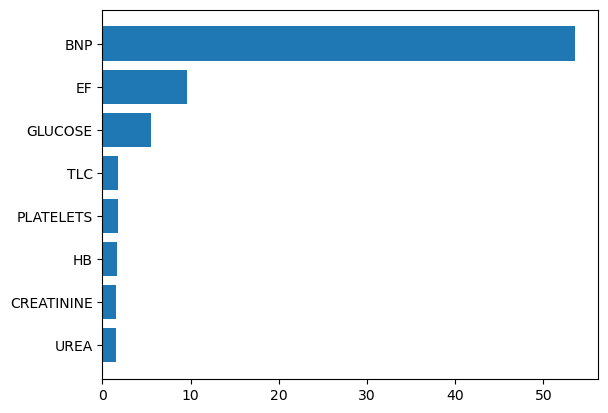

In [7]:
#DATA CLEANING

# Calculating the percentage of missing values for each column in the DataFrame
missing_percentage = (df[df.columns[df.isna().sum() > 0]].isna().sum() / len(df) * 100).sort_values()

# Extracting the column names with missing values
columns_with_missing_values = missing_percentage.index

# Creating a horizontal bar plot to visualize the missing data percentages
plt.barh(columns_with_missing_values, missing_percentage)

In [8]:
#DATA CLEANING
# Converting specific columns to numeric data type, and converting non-numeric values to NaN
df['BNP'] = pd.to_numeric(df['BNP'],errors='coerce')
df['EF'] = pd.to_numeric(df['EF'],errors='coerce')
df['GLUCOSE'] = pd.to_numeric(df['GLUCOSE'],errors='coerce')
df['TLC'] = pd.to_numeric(df['TLC'],errors='coerce')
df['PLATELETS'] = pd.to_numeric(df['PLATELETS'],errors='coerce')
df['HB'] = pd.to_numeric(df['HB'],errors='coerce')
df['CREATININE'] = pd.to_numeric(df['CREATININE'],errors='coerce')
df['UREA'] = pd.to_numeric(df['UREA'],errors='coerce')

In [10]:
#DATA CLEANING
# Exploring the correlation of columns to determine the best strategy for data cleaning
# Drop rows with missing values and convert specific columns to integer type
df_dropped = df.dropna()
columns_to_convert = ['BNP', 'EF', 'GLUCOSE', 'TLC', 'PLATELETS', 'HB', 'CREATININE', 'UREA']
df_dropped[columns_to_convert] = df_dropped[columns_to_convert].astype(int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14776\3718445273.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dropped[columns_to_convert] = df_dropped[columns_to_convert].astype(int)


In [11]:
#DATA CLEANING
# Select only numeric columns in the cleaned DataFrame
df_dropped1 = df_dropped.select_dtypes(include='number')


In [12]:
#DATA CLEANING
# Calculate the correlation matrix
corr_matrix = df_dropped1.corr()

# Set the correlation threshold
correlation_threshold = 0.5

In [13]:
#DATA CLEANING
# Filter values with correlation greater than 0.5 or less than -0.5
high_correlated_values = corr_matrix[(((corr_matrix > correlation_threshold) & (corr_matrix != 1))
                                      | ((corr_matrix < -correlation_threshold) & (corr_matrix != -1)))]

# Display the first few rows of the high correlated values DataFrame
high_correlated_values.head()


,SNO,AGE,DURATION OF STAY,duration of intensive unit stay,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,BNP,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM
SNO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DURATION OF STAY,NaN,NaN,NaN,0.793643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration of intensive unit stay,NaN,NaN,0.793643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SMOKING,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#DATA CLEANING

# Grab columns with at least one non-null value
high_correlated_columns = high_correlated_values.columns[high_correlated_values.notna().any()]


In [16]:
#DATA CLEANING
# Extract the high correlated columns from the cleaned DataFrame
high_correlated = df_dropped1[high_correlated_columns]
high_correlated.head()

,DURATION OF STAY,duration of intensive unit stay,PRIOR CMP,CKD,HB,UREA,CREATININE,EF,ANAEMIA,HEART FAILURE,HFREF,HFNEF,AKI,CARDIOGENIC SHOCK,SHOCK
0,3,2,0,0,9,34,0,35,1,1,1,0,0,0,0
4,23,9,1,0,13,55,1,16,0,0,0,0,0,0,0
5,10,8,1,0,13,51,0,25,0,1,1,0,0,0,0
6,6,2,1,0,13,28,0,30,0,1,1,0,0,0,0
10,15,11,0,0,13,45,1,32,0,1,1,0,0,1,1


<Axes: >

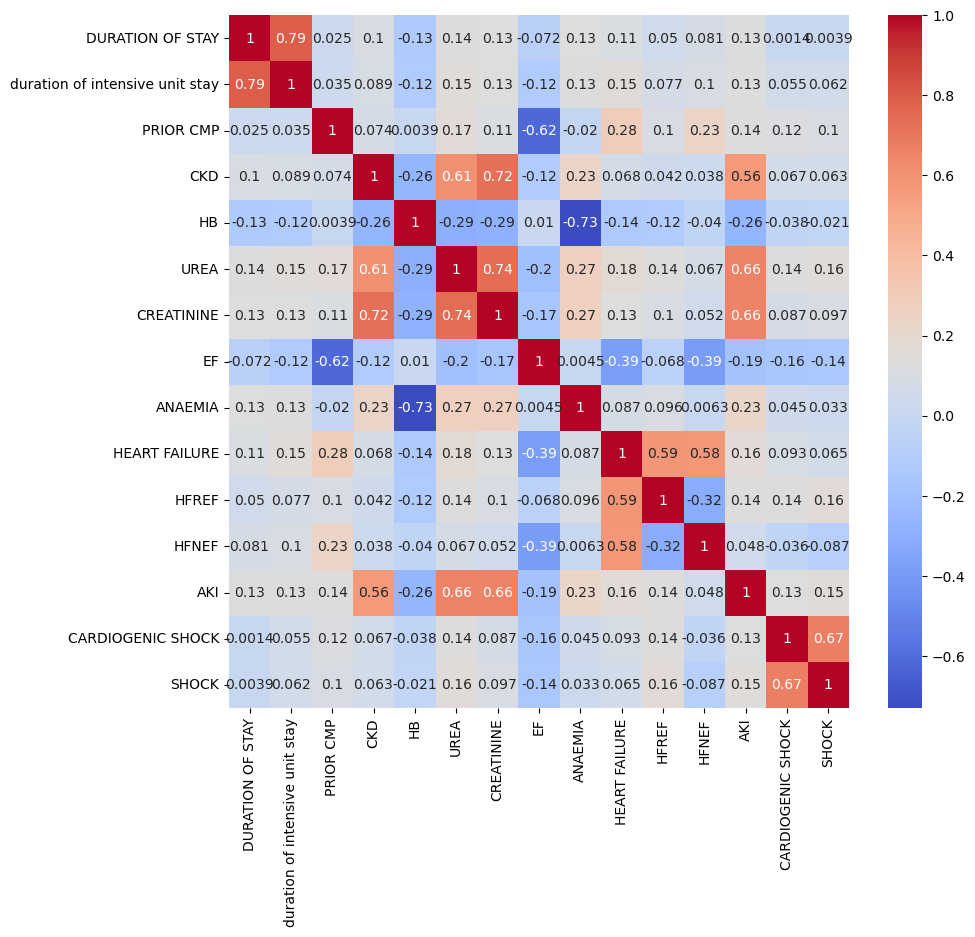

In [17]:
#DATA CLEANING
# Plot a heatmap of the correlation matrix for high correlated columns
plt.figure(figsize=(10, 9))
sns.heatmap(high_correlated.corr(), annot=True, cmap='coolwarm')

In [18]:
#The objective of the analysis lies on the premise of discharge(healing) or expiry(death).
#Therefore DAMA (Discharge Against Medical Advise) is a distortion to the data and should be removed.
df = df[df['OUTCOME'] != 'DAMA']

In [19]:
#HANDLING MISSING VALUES

#Given that BNP does not exhibit a high correlation with any other column 
#and the percentage of missing values exceeds 50%, the decision is to drop the column.
df = df.drop('BNP', axis=1)

In [20]:
#EF
#EJECTILE FUNCTION (The amount of blood that your heart pumps each time it beats)
df['EF'] = pd.to_numeric(df['EF'],errors='coerce')

In [21]:
df['EF'].isna().sum()

1522

In [22]:
(df[['EF','PRIOR CMP']].sort_values(by = 'EF',ascending = False)).value_counts()

EF    PRIOR CMP
60.0  0            4193
35.0  0             798
45.0  0             728
40.0  0             549
32.0  0             538
42.0  0             489
48.0  0             463
30.0  1             461
38.0  0             440
25.0  1             410
50.0  0             407
36.0  0             371
30.0  0             362
34.0  0             321
20.0  1             313
28.0  1             302
22.0  1             269
28.0  0             236
55.0  0             177
46.0  0             177
52.0  0             162
25.0  0             150
18.0  1             123
44.0  0              97
37.0  0              93
26.0  0              91
24.0  1              79
32.0  1              59
54.0  0              59
33.0  0              48
35.0  1              44
16.0  1              34
27.0  0              33
58.0  0              33
40.0  1              32
38.0  1              23
26.0  1              20
34.0  1              19
56.0  0              19
47.0  0              18
43.0  0              15


In [23]:
#In the analysis, we observe a moderate correlation between EF and prior CMD. 
#We notice instances where prior CMD is 0 correspond to an EF of 60. 
#Consequently, for missing EF values, we plan to impute them using the mode, which is determined to be 60.
df['EF']=df['EF'].fillna(df['EF'].mode()[0])

In [25]:
df['EF'].isna().sum()

0

In [26]:
#GLUCOSE
df['GLUCOSE'].isna().sum()

706

In [27]:
df['GLUCOSE'].head(10)

0     80.0
1    112.0
2    187.0
3    130.0
4    144.0
5    217.0
6    277.0
7    159.0
8    156.0
9    200.0
Name: GLUCOSE, dtype: float64

In [28]:

#In the glucose column, most values were observed to be close to each other. 
#As a result, the decision is  to use forward fill to fill in the missing values. 
#Forward fill involves replacing each missing value with the most recent non-null value in the column,
#allowing for a smoother continuity of values in the dataset. 
df['GLUCOSE'] = df['GLUCOSE'].fillna(method='ffill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14776\3604926048.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['GLUCOSE'] = df['GLUCOSE'].fillna(method='ffill')


In [29]:
df['GLUCOSE'].isna().sum()

0

In [30]:
#tlc
df['TLC'].head(10)

0    16.1
1     9.0
2    14.7
3     9.9
4     9.1
5    22.3
6    12.6
7     9.5
8     NaN
9     4.8
Name: TLC, dtype: float64

In [31]:
#In the TLC column, most values were observed to be close to each other. 
#As a result, the decision is  to use forward fill to fill in the missing values. 
#allowing for a smoother continuity of values in the dataset. 
df['TLC'] = df['TLC'].fillna(method='ffill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14776\3982753625.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TLC'] = df['TLC'].fillna(method='ffill')


In [33]:
df['TLC'].isna().sum()

0

In [34]:
#PLATELETS
df['PLATELETS'].isna().sum()

252

In [35]:
#In the PLATELETS column, most values were observed to be close to each other. 
#As a result, the decision is  to use backwardfill to fill in the missing values. 
#allowing for a smoother continuity of values in the dataset. 
df['PLATELETS'] = df['PLATELETS'].fillna(method='bfill')



C:\Users\DELL\AppData\Local\Temp\ipykernel_14776\965237043.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['PLATELETS'] = df['PLATELETS'].fillna(method='bfill')


In [37]:
df['PLATELETS'].isna().sum()

0

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='HB', ylabel='ANAEMIA'>

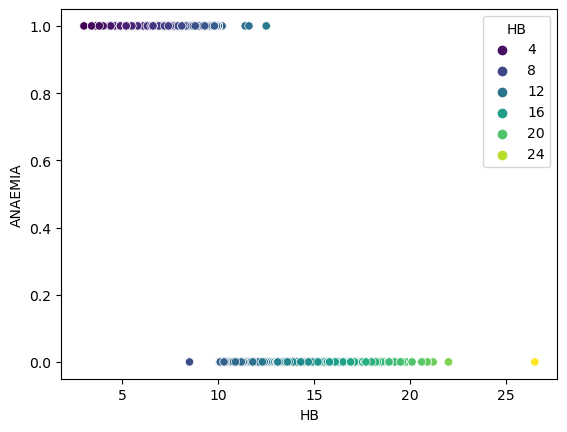

In [38]:
#HB
# Analyzing the correlation between 'HB' and 'ANAEMIA'
# Higher hemoglobin levels are correlated with a lower likelihood of anemia
df['HB'] = pd.to_numeric(df['HB'],errors='coerce')
sns.scatterplot(x='HB',y='ANAEMIA',data=df,hue='HB',palette='viridis',alpha=1.0)

In [39]:
# utilizes the groupby operation to calculate the median for each group
df_blood = df[['HB','ANAEMIA']]
df_blood.groupby('ANAEMIA').median()

,HB
ANAEMIA,
0,12.9
1,9.0


In [40]:
# Define a function to replace null values in 'HB' based on 'ANAEMIA' value
def replace_hb(row):
    # Check if 'HB' is null
    if pd.isna(row['HB']):
        # If 'ANAEMIA' is 0, replace null 'HB' with 12.9
        if row['ANAEMIA'] == 0:
            return 12.9
        # If 'ANAEMIA' is 1, replace null 'HB' with 9.0
        elif row['ANAEMIA'] == 1:
            return 9.0
    # If 'HB' is not null, return the original 'HB' value
    return row['HB']

# Apply the replace_hb function to each row using the apply function
df['HB'] = df.apply(replace_hb, axis=1)

In [41]:
df['HB'].isna().sum()

0

In [42]:
#'CREATININE'
df['CREATININE'].isna().sum()

215

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: xlabel='CREATININE', ylabel='CKD'>

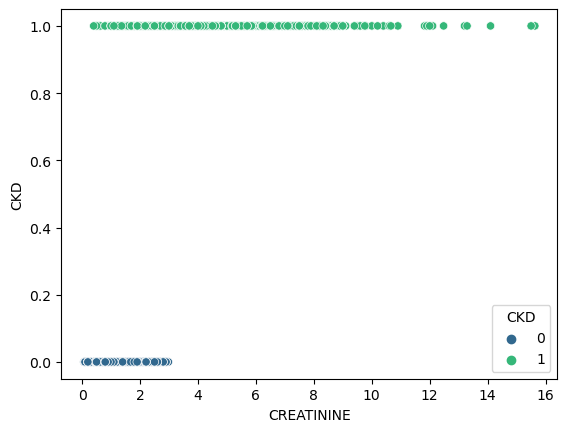

In [43]:
#it is evident that there exists a positive correlation between creatinine levels and the severity of CKD. 
#As creatinine is a waste product normally excreted by the kidneys, 
#elevated levels of creatinine in the blood suggest reduced kidney function

df['CREATININE'] = pd.to_numeric(df['CREATININE'],errors='coerce')
sns.scatterplot(x='CREATININE',y='CKD',data=df,hue='CKD',palette='viridis',alpha=1.0)

In [44]:
# Counting occurrences of unique pairs in the 'CREATININE' and 'CKD' columns
#'CKD' is a binary column indicating the presence (1) or absence (0) of chronic kidney disease
df[['CREATININE','CKD']].value_counts()

CREATININE  CKD
0.80        0      1469
0.70        0      1356
0.90        0      1216
0.60        0       923
1.00        0       862
                   ... 
3.21        1         1
3.24        1         1
3.31        1         1
3.32        1         1
15.63       1         1
Name: count, Length: 532, dtype: int64

In [45]:
#Grouping the DataFrame by the 'CKD' column and calculating the median of 'CREATININE' for each group
df[['CREATININE','CKD']].groupby('CKD').median()

,CREATININE
CKD,
0,0.9
1,3.5


In [46]:
# Define a function to replace null values in CREATININE based on CKD value
def replace_CREATININE(row):
    # Check if CREATININE is null
    if pd.isna(row['CREATININE']):
        # If CKD is 0, replace null 'CREATININE' with 0.9
        if row['CKD'] == 0:
            return  0.9
        # If CKD is 1, replace null 'CREATININE' with 3.5
        elif row['CKD'] == 1:
            return 3.5
    # If CREATININE is not null, return the original CREATININE value
    return row['CREATININE']

# Apply the replace_CKD function to each row using the apply function
df['CREATININE'] = df.apply(replace_CREATININE, axis=1)

In [47]:
df['CREATININE'].isna().sum()

0

In [48]:
#UREA
df['UREA'].isna().sum()

207

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='UREA', ylabel='CREATININE'>

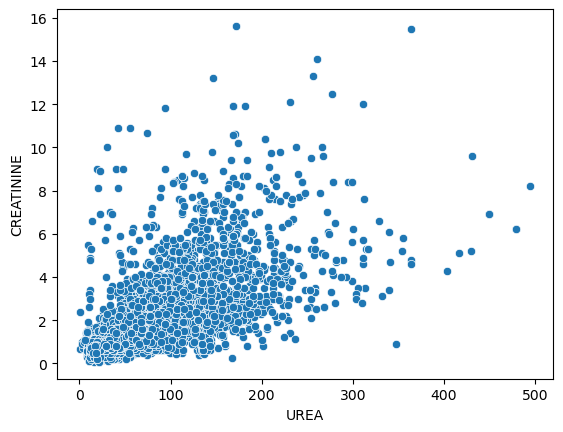

In [49]:
#Creatinine and UREA are among the substances that the kidneys filter out, 
#and their concentrations in the blood are correlated 

df['UREA'] = pd.to_numeric(df['UREA'],errors='coerce')
sns.scatterplot(x='UREA',y='CREATININE',data=df)

In [51]:
# Extracting a subset DataFrame with 'CREATININE' and 'UREA'
df_urea = df[['CREATININE', 'UREA']]

# Counting occurrences of unique 'CREATININE' values for rows where 'UREA' is NaN
urea_nan_creatinine_counts = df_urea[df_urea['UREA'].isna()]['CREATININE'].value_counts()
urea_nan_creatinine_counts

CREATININE
0.9    193
3.5     11
1.1      1
2.6      1
1.2      1
Name: count, dtype: int64

In [52]:
# Calculating the median of 'UREA' values where 'CREATININE' is equal to 0.90
urea_median = df_urea[df_urea['CREATININE'] == 0.90]['UREA'].median()

# Filling missing values in the original DataFrame's 'UREA' column with the calculated median
df['UREA'] = df['UREA'].fillna(urea_median)

In [53]:
df['UREA'].isna().sum()

0

In [54]:
#confirming there are no missing values
df.isna().sum()

SNO                                0
MRD No.                            0
D.O.A                              0
D.O.D                              0
AGE                                0
GENDER                             0
RURAL                              0
TYPE OF ADMISSION-EMERGENCY/OPD    0
month year                         0
DURATION OF STAY                   0
duration of intensive unit stay    0
OUTCOME                            0
SMOKING                            0
ALCOHOL                            0
DM                                 0
HTN                                0
CAD                                0
PRIOR CMP                          0
CKD                                0
HB                                 0
TLC                                0
PLATELETS                          0
GLUCOSE                            0
UREA                               0
CREATININE                         0
RAISED CARDIAC ENZYMES             0
EF                                 0
S

In [57]:
#noticed invalid entry in the chest infection column 
df['CHEST INFECTION'].unique()

array([0, 1, '\\'], dtype=object)

In [58]:
df[df['CHEST INFECTION']=='\\']

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
3252,3253,354971,2017-09-23 00:00:00,2017-09-24 00:00:00,65,F,U,O,2023-09-17,2,0,DISCHARGE,0,0,1,1,0,0,0,9.4,10.7,264.0,249.0,27.0,0.8,0,60.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,\


In [59]:
# Converting 'CHEST INFECTION' column to numeric and  '\\' to NaN
df['CHEST INFECTION'] = pd.to_numeric(df['CHEST INFECTION'], errors='coerce')

# Filling missing values using forward fill method
df['CHEST INFECTION'] = df['CHEST INFECTION'].fillna(method='ffill')

C:\Users\DELL\AppData\Local\Temp\ipykernel_14776\2939352724.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['CHEST INFECTION'] = df['CHEST INFECTION'].fillna(method='ffill')


In [60]:
#Checking for duplicates

In [56]:
#Display rows that are duplicates 
df[df.duplicated()]

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,duration of intensive unit stay,OUTCOME,SMOKING,ALCOHOL,DM,HTN,CAD,PRIOR CMP,CKD,HB,TLC,PLATELETS,GLUCOSE,UREA,CREATININE,RAISED CARDIAC ENZYMES,EF,SEVERE ANAEMIA,ANAEMIA,STABLE ANGINA,ACS,STEMI,ATYPICAL CHEST PAIN,HEART FAILURE,HFREF,HFNEF,VALVULAR,CHB,SSS,AKI,CVA INFRACT,CVA BLEED,AF,VT,PSVT,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION


In [57]:
#FEATURE ENGINEERING

In [61]:
# Converting 'D.O.A' (Date of Admission) column to datetime format, coercing errors to NaN
df['D.O.A'] = pd.to_datetime(df['D.O.A'], errors='coerce')

# Converting 'D.O.D' (Date of Discharge) column to datetime format, coercing errors to NaN
df['D.O.D'] = pd.to_datetime(df['D.O.D'], errors='coerce')

In [62]:
# Extracting year, month, and day components from the Date of Admission
df['arrival_year']=df['D.O.A'].dt.year
df['arrival_month']=df['D.O.A'].dt.month
df['arrival_day']=df['D.O.A'].dt.day

In [63]:
# Extracting year, month, and day components from the Date of Discharge
df['discharge_year']=df['D.O.D'].dt.year
df['discharge_month']=df['D.O.D'].dt.month
df['discharge_day']=df['D.O.D'].dt.day

In [62]:
#VISUALIZATION

In [64]:
Admission_Triage_data = df[['SMOKING ', 'ALCOHOL','DM', 'HTN', 'CAD', 'PRIOR CMP', 'CKD','RAISED CARDIAC ENZYMES',
'SEVERE ANAEMIA', 'ANAEMIA', 'STABLE ANGINA', 'ACS', 'STEMI',
'ATYPICAL CHEST PAIN', 'HEART FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
'CHB', 'SSS', 'AKI', 'CVA INFRACT', 'CVA BLEED', 'AF', 'VT', 'PSVT',
'CONGENITAL', 'UTI', 'NEURO CARDIOGENIC SYNCOPE', 'ORTHOSTATIC',
'INFECTIVE ENDOCARDITIS', 'DVT', 'CARDIOGENIC SHOCK', 'SHOCK',
'PULMONARY EMBOLISM', 'CHEST INFECTION']]

In [65]:
# Counting how many times each disease appears
sorted_values = Admission_Triage_data.apply(lambda x: x.value_counts()).iloc[1]
sorted_values

SMOKING                        734
ALCOHOL                        946
DM                            4780
HTN                           7270
CAD                          10050
PRIOR CMP                     2274
CKD                           1391
RAISED CARDIAC ENZYMES        2879
SEVERE ANAEMIA                 278
ANAEMIA                       2581
STABLE ANGINA                 1267
ACS                           5365
STEMI                         2065
ATYPICAL CHEST PAIN            401
HEART FAILURE                 4218
HFREF                         2256
HFNEF                         1973
VALVULAR                       531
CHB                            373
SSS                             98
AKI                           3200
CVA INFRACT                    425
CVA BLEED                       60
AF                             762
VT                             469
PSVT                           117
CONGENITAL                     159
UTI                            934
NEURO CARDIOGENIC SY

Text(0.5, 1.0, 'Commonly Admitted Diseases')

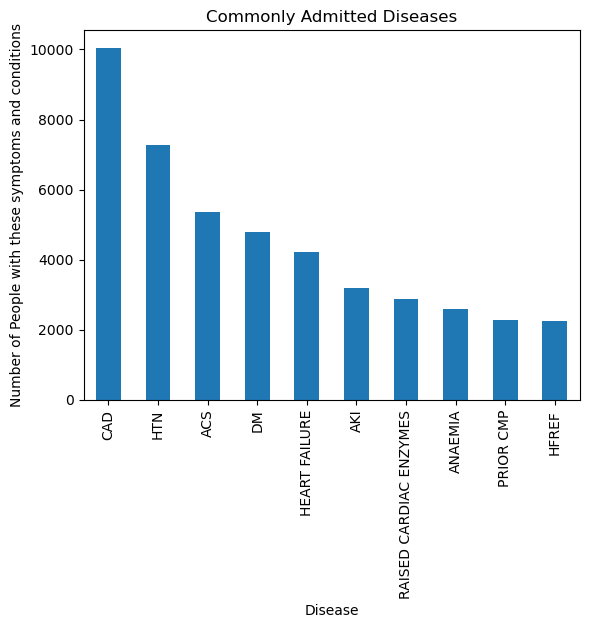

In [66]:
sorted_values.nlargest(10).plot(kind='bar')
plt.xlabel('Disease')
plt.ylabel('Number of People with these symptoms and conditions')
plt.title('Commonly Admitted Diseases')

In [83]:
summary_stats = df[['AGE','DURATION OF STAY','EF']].describe()
print(summary_stats)

                AGE  DURATION OF STAY
count  15757.000000      15757.000000
mean      61.426160          6.415054
std       13.420862          5.011421
min        4.000000          1.000000
25%       54.000000          3.000000
50%       62.000000          5.000000
75%       70.000000          8.000000
max      110.000000         98.000000


In [85]:
#Produce summary statistics
# Exclude 'column1' and 'column2' from the DataFrame
df = df.drop(['month year',], axis=1)
summary=df.describe()
print(summary)

                SNO           AGE  DURATION OF STAY  \
count  15757.000000  15757.000000      15757.000000   
mean    7879.000000     61.426160          6.415054   
std     4548.798431     13.420862          5.011421   
min        1.000000      4.000000          1.000000   
25%     3940.000000     54.000000          3.000000   
50%     7879.000000     62.000000          5.000000   
75%    11818.000000     70.000000          8.000000   
max    15757.000000    110.000000         98.000000   

       duration of intensive unit stay      SMOKING        ALCOHOL  \
count                      15757.00000  15757.000000  15757.000000   
mean                           3.80377      0.050327      0.064797   
std                            4.01564      0.218625      0.246174   
min                            0.00000      0.000000      0.000000   
25%                            1.00000      0.000000      0.000000   
50%                            3.00000      0.000000      0.000000   
75%           

In [87]:
# Visualizations for correlation between chronic kidney disease and diabetes
#df['UREA'] = pd.to_numeric(df['UREA'],errors='coerce')
#sns.scatterplot(x='UREA',y='CREATININE',data=df)

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


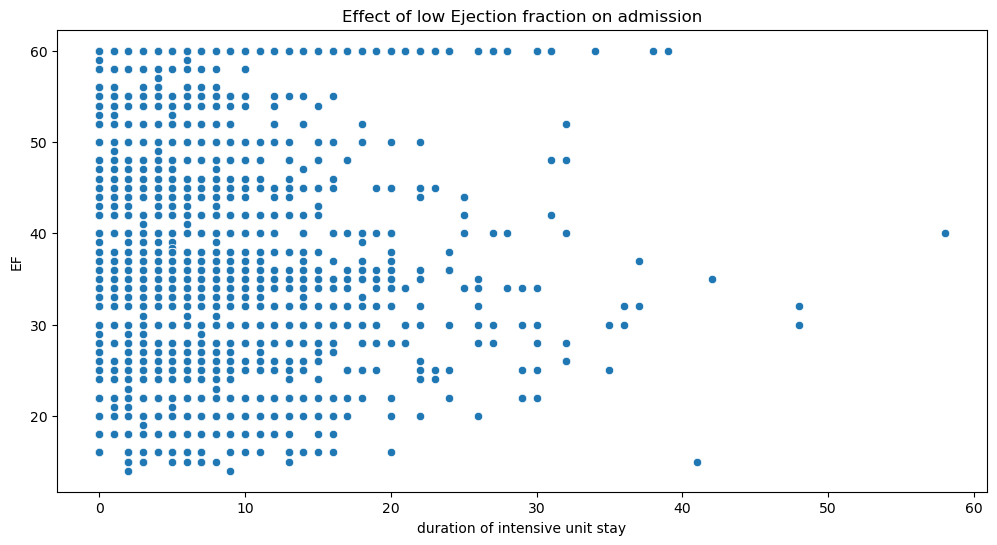

In [79]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration of intensive unit stay', y='EF', data=df)
plt.xlabel('duration of intensive unit stay')
plt.ylabel('EF')
plt.title('Effect of low Ejection fraction on admission')
plt.show()

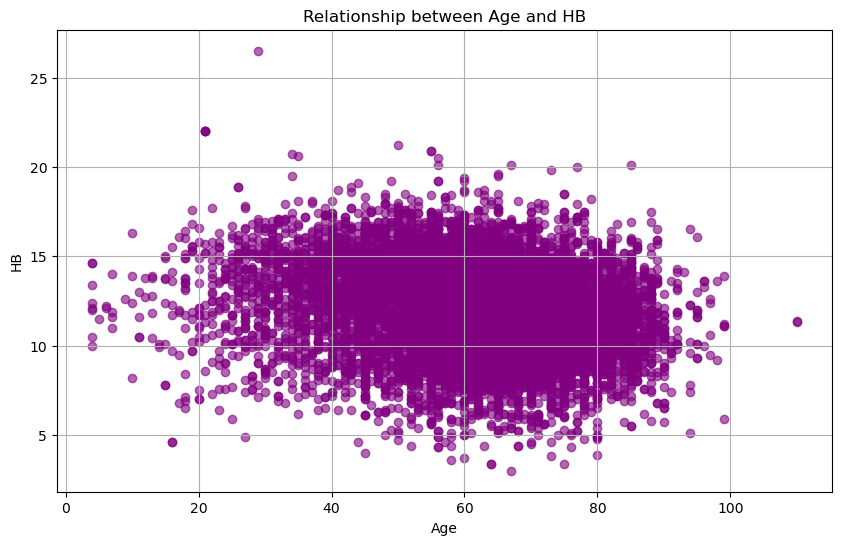

In [100]:
# Scatter plot: Age vs HB
df['HB'] = pd.to_numeric(df['HB'], errors='coerce')
plt.figure(figsize=(10, 6))
plt.scatter(df['AGE'], df['HB'], alpha=0.6, color='purple')
plt.title('Relationship between Age and HB')
plt.xlabel('Age')
plt.ylabel('HB')
plt.grid(True)
plt.show()

In [1]:
#Visualization

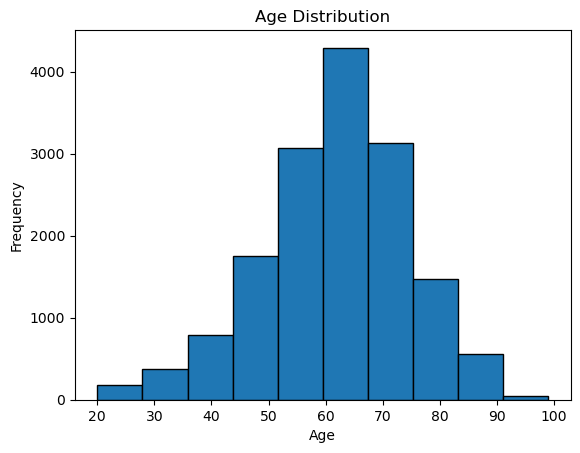

In [109]:
# Plot a histogram
age_min = 20
age_max = 100

# Create a subset of data within age range
subset_df = df[(df['AGE'] >= age_min) & (df['AGE'] <= age_max)]
plt.hist(subset_df['AGE'], bins=10, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()